In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Q1: How many rows and columns are in the dataset?
df = pd.read_csv('Online Retail.csv', encoding='ISO-8859-1')
df.shape

(541909, 8)

In [13]:
#Q2: What is the time range of transactions?
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [14]:
#Q3: How many unique customers and products are there?
df['CustomerID'].nunique(), df['StockCode'].nunique()

(4372, 4070)

In [15]:
#Q4: What are the top 5 countries by transaction count?
df['Country'].value_counts().head(5)


Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

In [16]:
#Q5: How many transactions had negative quantity (returns)?
df[df['Quantity'] < 0].shape[0]

10624

In [17]:
#Q6: What is the total revenue generated?
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice'].sum()


np.float64(9747747.934)

In [18]:
#Q7: What are the top 10 selling products by quantity?
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

<Axes: title={'center': 'Monthly Revenue'}, xlabel='InvoiceDate'>

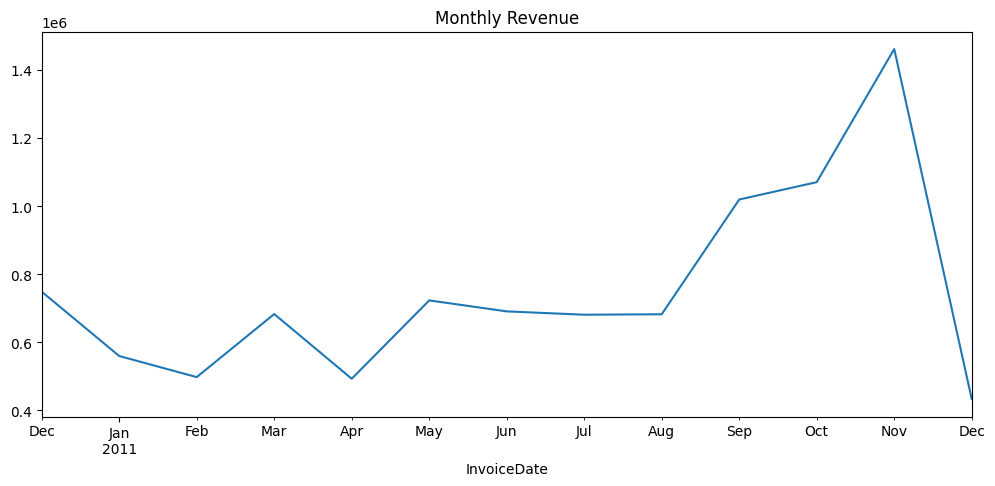

In [33]:
#Q8: Monthly revenue trend?
# Ensure index is datetime
df.index = pd.to_datetime(df.index)

# Create 'TotalPrice' if not already created
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Resample monthly and plot
monthly_sales = df.resample('ME')['TotalPrice'].sum()
monthly_sales.plot(kind='line', figsize=(12, 5), title="Monthly Revenue")


<Axes: title={'center': 'Sales by Hour of Day'}, xlabel='Hour'>

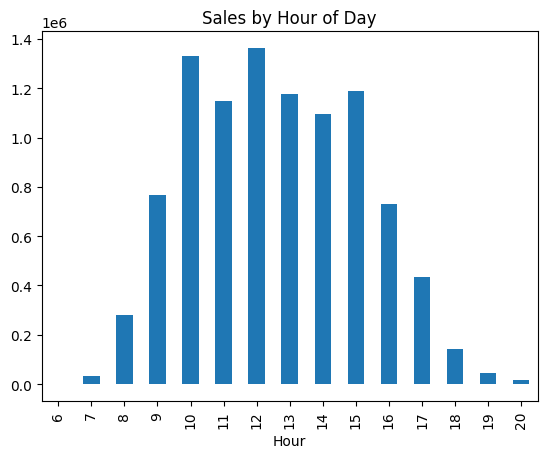

In [30]:
#Q9: Sales by hour of day?
df['Hour'] = df.index.hour
df.groupby('Hour')['TotalPrice'].sum().plot(kind='bar', title='Sales by Hour of Day')

In [21]:
#Q10: Who are the top 5 most valuable customers?
df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5)


CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: TotalPrice, dtype: float64

In [34]:
#Q11: Perform RFM Analysis (Recency, Frequency, Monetary)
# Make sure InvoiceDate is the index and in datetime format
df.index = pd.to_datetime(df.index)

# Step 1: Create TotalPrice if not already
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 2: Define snapshot date (day after last purchase)
snapshot_date = df.index.max() + pd.Timedelta(days=1)

# Step 3: Group by CustomerID to calculate Frequency and Monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Step 4: Add Recency separately using index (InvoiceDate)
recency = df.groupby('CustomerID').apply(lambda x: (snapshot_date - x.index.max()).days)

# Step 5: Combine into final RFM DataFrame
rfm['Recency'] = recency

# Step 6: Rename columns
rfm.rename(columns={
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Step 7: Reorder columns
rfm = rfm[['Recency', 'Frequency', 'Monetary']]

# Step 8: Show result
rfm.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4016\913296705.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recency = df.groupby('CustomerID').apply(lambda x: (snapshot_date - x.index.max()).days)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


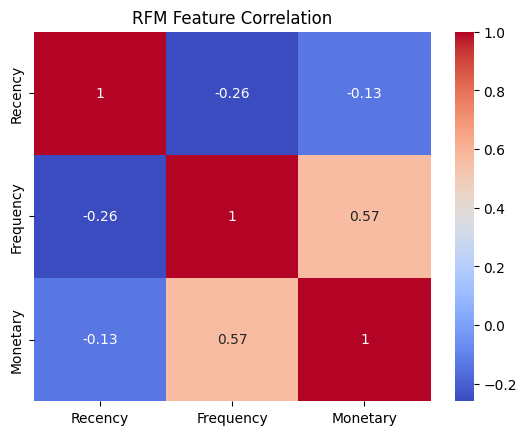

In [24]:
#Q12: Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.title("RFM Feature Correlation")
plt.show()


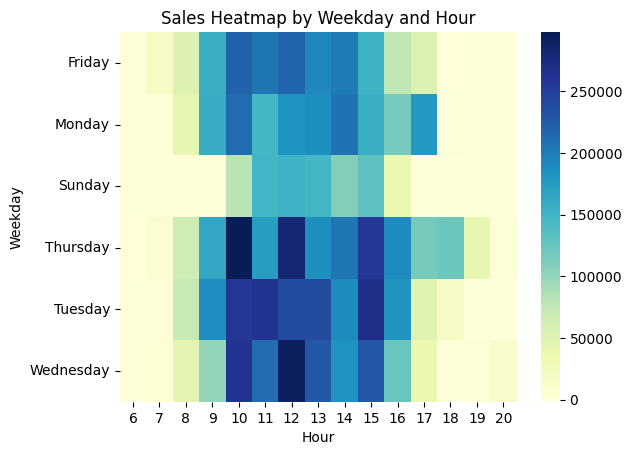

In [25]:
#Q13: Create a heatmap of sales by weekday and hour
df['Weekday'] = df.index.day_name()
sales_heatmap = df.pivot_table(index='Weekday', columns='Hour', values='TotalPrice', aggfunc='sum')
sns.heatmap(sales_heatmap.fillna(0), cmap='YlGnBu')
plt.title("Sales Heatmap by Weekday and Hour")
plt.show()


In [26]:
#Q14: Identify top returned products
df_returns = df[df['Quantity'] < 0]
df_returns.groupby('Description')['Quantity'].sum().sort_values().head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
printing smudges/thrown away          -19200
Unsaleable, destroyed.                -15644
check                                 -13247
?                                      -9496
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Printing smudges/thrown away           -9058
Damaged                                -7540
throw away                             -5368
Name: Quantity, dtype: int64